## Breast Cancer Prediction
by: Jeremiah Chinyelugo

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
cols = ['id','Clump Thickness', 'Uniformity of Cell Size',
'Uniformity of Cell Shape', 
'Marginal Adhesion', 
'Single Epithelial Cell Size',  
'Bare Nuclei',         
'Bland Chromatin',             
'Normal Nucleoli',
'Mitoses','target']

In [5]:
df = pd.read_csv('C://Users//JERRY//Documents//Pyhton Books//Machine Learning//Datasets//Breast Cancer//breast-cancer-wisconsin.txt', header=None, names = cols)
df.head()

,id,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,target
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


This breast cancer databases was obtained from the University of Wisconsin
Hospitals, Madison from Dr. William H. Wolberg.

Attribute Information:

   #  Attribute                     Domain
   -- -----------------------------------------
   1. Sample code number            id number
   2. Clump Thickness               1 - 10
   3. Uniformity of Cell Size       1 - 10
   4. Uniformity of Cell Shape      1 - 10
   5. Marginal Adhesion             1 - 10
   6. Single Epithelial Cell Size   1 - 10
   7. Bare Nuclei                   1 - 10
   8. Bland Chromatin               1 - 10
   9. Normal Nucleoli               1 - 10
   10. Mitoses                      1 - 10
   11. Class:                       (2 for benign, 4 for malignant)


I'll drop the Id column

In [6]:
df.drop('id', axis = 1, inplace = True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Clump Thickness              699 non-null    int64 
 1   Uniformity of Cell Size      699 non-null    int64 
 2   Uniformity of Cell Shape     699 non-null    int64 
 3   Marginal Adhesion            699 non-null    int64 
 4   Single Epithelial Cell Size  699 non-null    int64 
 5   Bare Nuclei                  699 non-null    object
 6   Bland Chromatin              699 non-null    int64 
 7   Normal Nucleoli              699 non-null    int64 
 8   Mitoses                      699 non-null    int64 
 9   target                       699 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 54.7+ KB


The column `Bare Nuclei` is the only one with an object datatype meaning it contains non-numeric elements.

In [8]:
df['Bare Nuclei'].value_counts()

1     402
10    132
2      30
5      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: Bare Nuclei, dtype: int64

There's a question mark. We can drop those instances since it's just about 2% of our data

In [9]:
idx = df[df['Bare Nuclei'] == '?'].index.to_list()
df = df.drop(index = idx, axis = 0)
df['Bare Nuclei'] = df['Bare Nuclei'].astype(np.int64)

Next we are going to find out the percentage of malignant cells

In [10]:
df['target'].value_counts() / len(df)

2    0.650073
4    0.349927
Name: target, dtype: float64

So this is an imbalanced datset with 65% of the targets being benign and 35 being malignant

Next, we change the target values from `[2,4]` to `[0,1]` 

In [11]:
df['target'] = np.where(df['target'] == 2, 0, 1)

In [12]:
df.describe()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,target
count,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221,0.349927
std,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674,0.477296
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,0.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,0.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000


### Importing the models

In [13]:
from sklearn.model_selection import train_test_split, cross_val_score

In [14]:
train, test = train_test_split(df, test_size = .25, random_state = 42, stratify = df['target'])

In [15]:
y_train = train['target']
X_train = train.drop(['target'], axis = 1)

y_test = test['target']
X_test = test.drop(['target'], axis = 1)

In [16]:
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import time
from sklearn.metrics import f1_score, precision_score, recall_score

#### Training the models

In [17]:
svc_clf = LinearSVC(random_state = 42, max_iter = 100_000)
knn_clf = KNeighborsClassifier(n_neighbors = 3)
log_reg = LogisticRegression(random_state = 42)
sgd_clf = SGDClassifier(random_state = 42)
rnd_clf = RandomForestClassifier(random_state = 42)
grd_clf = GradientBoostingClassifier(random_state = 42)

In [18]:
models = [svc_clf, knn_clf, log_reg, sgd_clf, rnd_clf, grd_clf]

for model in models:
    model.fit(X_train, y_train)
    pred = model.predict(X_train)
    pr_score = precision_score(y_train, pred)
    re_score = recall_score(y_train, pred)
    score = f1_score(y_train, pred)
    print(f'\n{model.__class__.__name__} precision score: {pr_score:.2f}')
    print(f'{model.__class__.__name__} recall score: {re_score:.2f}')
    print(f'{model.__class__.__name__} f1 score: {score:.2f}')


LinearSVC precision score: 0.97
LinearSVC recall score: 0.96
LinearSVC f1 score: 0.97

KNeighborsClassifier precision score: 0.98
KNeighborsClassifier recall score: 0.97
KNeighborsClassifier f1 score: 0.97

LogisticRegression precision score: 0.97
LogisticRegression recall score: 0.96
LogisticRegression f1 score: 0.97

SGDClassifier precision score: 0.97
SGDClassifier recall score: 0.98
SGDClassifier f1 score: 0.98

RandomForestClassifier precision score: 1.00
RandomForestClassifier recall score: 1.00
RandomForestClassifier f1 score: 1.00

GradientBoostingClassifier precision score: 1.00
GradientBoostingClassifier recall score: 1.00
GradientBoostingClassifier f1 score: 1.00


The RandomForestClassifier and the GradientBoostingClassifier performs better than other models. For the sake of brevity i'll be using the GradientBoostingClassifier going forward

### The Test Set

In [19]:
grd_clf.fit(X_train, y_train)
pred = grd_clf.predict(X_test)
pr_score = precision_score(y_test, pred)
re_score = recall_score(y_test, pred)
score = f1_score(y_test, pred)
print(f'\n{rnd_clf.__class__.__name__} precision score: {pr_score:.3f}')
print(f'{rnd_clf.__class__.__name__} recall score: {re_score:.3f}')
print(f'{rnd_clf.__class__.__name__} f1 score: {score:.2f}')


RandomForestClassifier precision score: 0.922
RandomForestClassifier recall score: 0.983
RandomForestClassifier f1 score: 0.95


##### Confusion Matrix

In [20]:
from sklearn.metrics import confusion_matrix

Let's take a look at the confusion matrix, which tells us how the targets were classfified.

\begin{align}
Precision = \frac{True\:Positives}{True\:Positives + False\:Negatives}
\end{align}

\begin{align}
Recall = \frac{True\:Negatives}{True\:Negatives + False\:Positives}
\end{align}

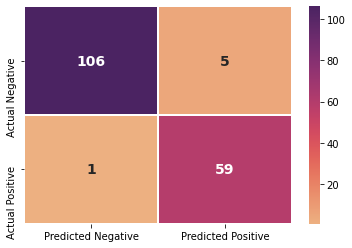

In [21]:
grd_clf.fit(X_train, y_train)
pred = grd_clf.predict(X_test)
conf_matrix = confusion_matrix(y_test, pred)

plt.figure(figsize = (6,4))
sns.heatmap(conf_matrix, annot = True, cmap = 'flare', fmt = '.0f', annot_kws = {'size':'14','weight':'bold'},
           xticklabels = ['Predicted Negative', 'Predicted Positive'], 
           yticklabels = ['Actual Negative', 'Actual Positive'], linewidth = 2)
plt.show()

From the confusion matrix, we can see that we have 1 FalseNegatives and 5 FalsePositives.

lets look at the Receiver Operator Curve

In [22]:
from sklearn.metrics import roc_curve, roc_auc_score

In [23]:
grd_clf.fit(X_train, y_train)
pred_proba = grd_clf.predict_proba(X_test)
pred_proba = pred_proba[:,1]

In [24]:
fpr, tpr, thresholds = roc_curve(y_test, pred_proba)

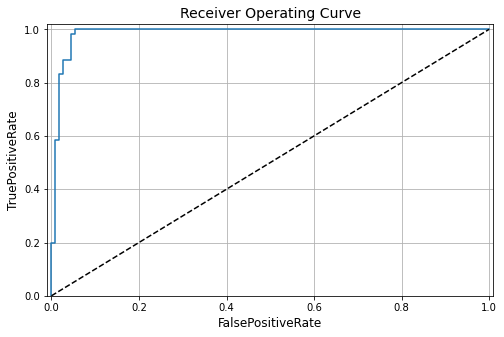

In [25]:
plt.figure(figsize=(8,5))
plt.plot(fpr, tpr)
plt.plot([0,1],[0,1], 'k--')
plt.axis([-0.01,1.01,0,1.02])
plt.grid()
plt.xlabel('FalsePositiveRate', size = 12)
plt.ylabel('TruePositiveRate', size = 12)
plt.title('Receiver Operating Curve', size = 14)
plt.show()

Another common metric is the **Area Under the Curve**, or **AUC**. This is a convenient way to capture the performance of a model in a single number, although it's not without certain issues. As a rule of thumb, an AUC can be classed as follows,

- 0.90 - 1.00 = excellent
- 0.80 - 0.90 = good
- 0.70 - 0.80 = fair
- 0.60 - 0.70 = poor
- 0.50 - 0.60 = fail

Let's see what the above ROC gives us,

In [26]:
roc_score = roc_auc_score(y_test, pred_proba)
print(f'ROC Score: {roc_score:.2f}')

ROC Score: 0.99


One thing to note about classification is the precision/recall tradeoff. Depending on the business case we might have to prioritise one over the other. 

For this task, we have to prioritise recall over precision. We want to indentify all patients with cancerous cells even though we might have some false positives from time to time. It's better for patients to take a second/more detailed test to find out that they don't have cancer than for we to have a high precision and leave out patients that have cancer.

To Understand this tradeoff read about the "Precision/Recall TradeOff"

In [27]:
from sklearn.metrics import precision_recall_curve

In [28]:
grd_clf.fit(X_train, y_train)
pred_proba = grd_clf.predict_proba(X_test)
pred_proba = pred_proba[:,1]

We'll have to adjust the threshold to get a recall of 100%. However before we do that, let's look ath the default threshold of 0.5

In [29]:
precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba)

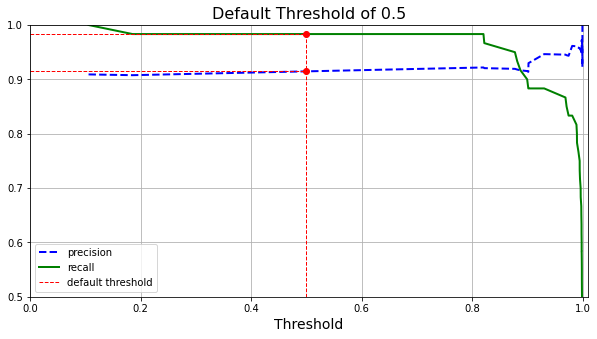

In [30]:
plt.figure(figsize=(10,5))
plt.plot(thresholds, precisions[:-1], 'b--', label = 'precision', lw = 2)
plt.plot(thresholds, recalls[:-1], 'g', label = 'recall', lw = 2)
plt.plot([0.5,0.5],[0.5,.983], 'r--', lw = 1, label = 'default threshold')
plt.plot([0,0.5],[0.983,0.983], 'r--', lw = 1)
plt.plot([0,0.5],[0.915,0.915], 'r--', lw = 1)
plt.plot([0.5],[0.983], 'o', color = 'red')
plt.plot([0.5],[0.915], 'o', color = 'red')
plt.axis([0,1.01,0.5,1.0])
plt.xlabel('Threshold', fontsize = 14)
plt.title('Default Threshold of 0.5', fontsize = 16)
plt.grid()
plt.legend()
plt.show()

#### Increasing our Recall

In [31]:
# Our adjusted threshold to get 100% recall

new_threshold = thresholds[np.argmax(recalls >= 1)]
new_threshold

0.10584936959816528

In [32]:
# Our new precision

precisions[np.argmax(recalls >= 1)]

0.9090909090909091

In [33]:
grd_clf.fit(X_train, y_train)
pred_proba = grd_clf.predict_proba(X_test)
pred_proba = pred_proba[:,1]
new_pred_proba = np.where(pred_proba >= new_threshold, 1, 0)

We'll have to adjust the threshold to get a recall of 100%. However before we do that, let's look ath the default threshold of 0.5

In [34]:
precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba)

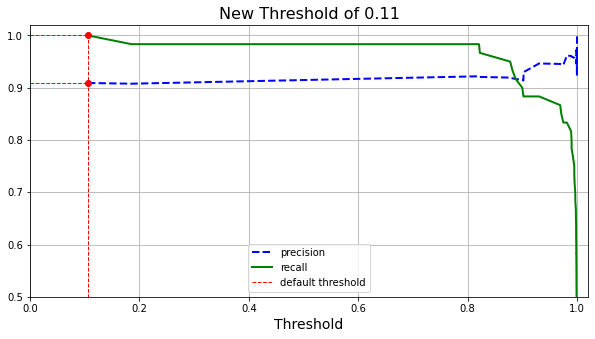

In [35]:
plt.figure(figsize=(10,5))
plt.plot(thresholds, precisions[:-1], 'b--', label = 'precision', lw = 2)
plt.plot(thresholds, recalls[:-1], 'g', label = 'recall', lw = 2)
plt.plot([0.1058,0.1058],[0,1], 'r--', lw = 1, label = 'default threshold')
plt.plot([0,0.1058],[1,1], 'r--', lw = 1)
plt.plot([0,0.1058],[0.9090,0.9090], 'r--', lw = 1)
plt.plot([0.1058],[1], 'o', color = 'red')
plt.plot([0.1058],[0.9090], 'o', color = 'red')
plt.axis([0,1.02,0.5,1.02])
plt.xlabel('Threshold', fontsize = 14)
plt.title('New Threshold of 0.11', fontsize = 16)
plt.grid()
plt.legend()
plt.show()

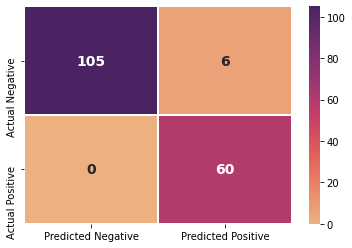

In [36]:
grd_clf.fit(X_train, y_train)
pred = grd_clf.predict(X_test)
conf_matrix = confusion_matrix(y_test, new_pred_proba)

plt.figure(figsize = (6,4))
sns.heatmap(conf_matrix, annot = True, cmap = 'flare', fmt = '.0f', annot_kws = {'size':'14','weight':'bold'},
           xticklabels = ['Predicted Negative', 'Predicted Positive'], 
           yticklabels = ['Actual Negative', 'Actual Positive'], linewidth = 2)
plt.show()

From Our New Confusion matrix, we can see we have reduced False Negatives. This has come as a cost of increasing our False Positives from 5 to 6. This is however better than misdiagnosing patients with positive tests

In [37]:
fpr, tpr, thresholds = roc_curve(y_test, new_pred_proba)

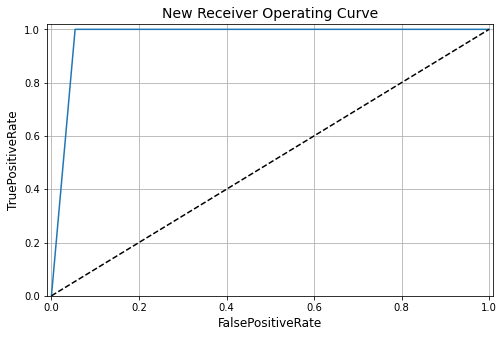

In [38]:
plt.figure(figsize=(8,5))
plt.plot(fpr, tpr)
plt.plot([0,1],[0,1], 'k--')
plt.axis([-0.01,1.01,0,1.02])
plt.grid()
plt.xlabel('FalsePositiveRate', size = 12)
plt.ylabel('TruePositiveRate', size = 12)
plt.title('New Receiver Operating Curve', size = 14)
plt.show()

In [39]:
# New ROC Score

roc_score = roc_auc_score(y_test, new_pred_proba)
print(f'ROC Score: {roc_score:.2f}')

ROC Score: 0.97


In [ ]:
import eli5
from eli5.sklearn import PermutationImportance
import shap

In [ ]:
from pdpbox import pdp, info_plots

In [ ]:
import pdpbox